# Scientific Research Project 7 - Practical 1

In the first exercise, we downloaded a CSV file of earthquake information from the USGS database. In this practical, we're going to use the Python programming language to make some nice map plots of the dataset.

To do that, we're going to use what's called a *Jupyter notebook*: an interactive notebook which contains a mixture of text and code blocks. To run the code in a particular cell, you simply click on that cell and either click the `Run` button in the top left, or press `Shift+Enter`.

We are running a Jupyter notebook in Google Colab: this allows you to run the code in your browser. What you are actually doing is running it on a Google server in the cloud, not on your local computer. This is useful, because we can take advantage of Google's processing power instead of having to rely on local laptop processing (which will be much slower).

In this practical, read through the contents of each cell and then run it to see what it does. **Make sure you understand what the code is doing - don't just blindly click through!** For your final project assignment, you can re-run and modify this notebook with your own dataset to make some nice plots for your report.
****
To work through this notebook, firstly:
1. Read through the instructions and execute each code block cell by clicking `Shift and Enter` to see what it does.
2. Do the exercise set out at the end of the notebook.
3. Save the figures and upload them to the Discussion Board on Duo.

### Getting started with Python

Ok, let's get started with some Python! If you've never coded before, look at this notebook for a simple introduction: [Click here](https://colab.research.google.com/github/adamlamee/CODINGinK12/blob/master/notebooks/intro.ipynb)

Python is a very easy programming language which has a lot of built in packages that can help us to do analyses. To access these helpful pieces of code, we first of all have to `import` them. To do this we just use the `import` command as shown below. The main ones are:

* `numpy`: a very useful package which allows us to do some important mathematical computations. See here for more details: https://numpy.org/
* `pandas`: this package allows us to load in CSV files to what are called _dataframes_: you can think of a dataframe as being similar to a spreadsheet, but a lot more efficient. https://pandas.pydata.org/docs/getting_started/overview.html
* `matplotlib`: we use this to make nice figures and plots. You can look at the matplotlib gallery for examples of plots you can make with it: https://matplotlib.org/3.1.1/gallery/index.html
* `cartopy`: this is a package specifically for making maps. We're going to use it in this exercise to plot the locations of our earthquakes.

In [12]:
# Lines which start with a # symbol are comments - they are ignored when the code is run.
# import several helpful packages that we'll use
import numpy as np # linear algebra
import pandas as pd # data processing. We can read in csv files using pd.read_csv('path/to/csv-file')
import matplotlib.pyplot as plt # package for making figures
import matplotlib.cm as cm # package for colours

In [3]:
# Google Colab doesn't have cartopy automatically installed. This code installs and imports it.
!grep '^deb ' /etc/apt/sources.list | \
  sed 's/^deb /deb-src /g' | \
  tee /etc/apt/sources.list.d/deb-src.list
!apt-get -qq update

!apt-get -qq build-dep python3-cartopy
!pip uninstall -y shapely

!pip install --no-binary cartopy cartopy==0.17.0
import cartopy

deb-src http://archive.ubuntu.com/ubuntu/ bionic main restricted
deb-src http://archive.ubuntu.com/ubuntu/ bionic-updates main restricted
deb-src http://archive.ubuntu.com/ubuntu/ bionic universe
deb-src http://archive.ubuntu.com/ubuntu/ bionic-updates universe
deb-src http://archive.ubuntu.com/ubuntu/ bionic multiverse
deb-src http://archive.ubuntu.com/ubuntu/ bionic-updates multiverse
deb-src http://archive.ubuntu.com/ubuntu/ bionic-backports main restricted universe multiverse
deb-src http://security.ubuntu.com/ubuntu/ bionic-security main restricted
deb-src http://security.ubuntu.com/ubuntu/ bionic-security universe
deb-src http://security.ubuntu.com/ubuntu/ bionic-security multiverse
deb-src https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/
Uninstalling Shapely-1.7.1:
  Successfully uninstalled Shapely-1.7.1
  Using cached https://files.pythonhosted.org/packages/9d/18/557d4f55453fe00f59807b111cc7b39ce53594e13ada88e16738fb4ff7fb/Shapely-1.7.1-cp36-cp36m-manylinux1_x86_64.

We've successfully imported the modules that we need. Now we have to load in our earthquake data that we downloaded in the previous step. 

The first step is to upload the data to Google Colab. To do this, click the small folder icon on the left hand bar and then click `Upload to Session Storage`. You can then navigate to the CSV file we downloaded and add it to Google Colab.

**NOTE** - you will have to re-upload the data to Google Colab whenever you want to run this notebook. 

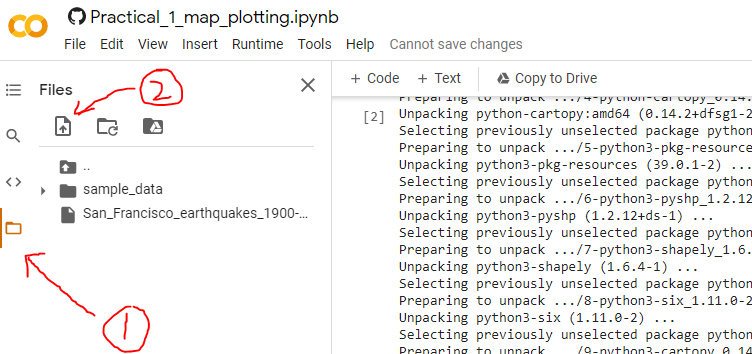

### Exploring the dataset
Once you have uploaded the file and you can see it in the left hand bar, we can then load it into Python using the code in the cell below. To load it we will use the `pandas` module. `pandas` has a function called `read_csv` which allows us to read in the CSV file that we uploaded. We will store it in a variable called `df` which stands for `data frame` - this is the name of data tables in `pandas`.

In [4]:
df = pd.read_csv('San_Francisco_earthquakes_1900-2020.csv') # This needs to correspond to the name of the file you uploaded. You can change it to represent your own file 

You can then type `df` to see what the data look like:

In [5]:
df

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2019-10-15T19:42:30.540Z,36.645500,-121.274000,10.100,4.71,mw,89.0,54.0,0.04759,0.14,nc,nc73292360,2020-09-29T22:06:48.876Z,"17km SSE of Tres Pinos, CA",earthquake,0.15,0.31,NaN,4.0,reviewed,nc,nc
1,2017-11-13T19:31:29.050Z,36.630500,-121.244333,6.310,4.58,mw,82.0,55.0,0.05988,0.11,nc,nc72923380,2018-10-05T14:00:40.985Z,"22km NE of Gonzales, California",earthquake,0.12,0.36,NaN,6.0,reviewed,nc,nc
2,2014-08-24T10:20:44.070Z,38.215167,-122.312333,11.120,6.02,mw,369.0,28.0,0.03604,0.18,nc,nc72282711,2020-08-14T23:04:26.676Z,South Napa,earthquake,0.11,0.15,NaN,0.0,reviewed,nc,nc
3,2011-08-27T07:18:21.150Z,36.584333,-121.180833,7.500,4.64,mw,97.0,31.0,0.08108,0.08,nc,nc71627835,2020-05-02T02:50:33.967Z,Central California,earthquake,0.11,0.30,NaN,5.0,reviewed,nc,nc
4,2011-01-12T08:51:03.680Z,36.771167,-121.496333,7.661,4.50,mw,134.0,35.0,0.01802,0.19,nc,nc71508850,2020-05-02T02:42:59.011Z,Central California,earthquake,0.15,0.28,NaN,16.0,reviewed,nc,nc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,1904-07-30T10:26:00.000Z,38.500000,-122.000000,NaN,4.50,ml,NaN,NaN,NaN,NaN,ushis,ushis430,2018-06-04T20:43:44.000Z,Northern California,earthquake,NaN,NaN,NaN,NaN,reviewed,ushis,cdmg
168,1903-08-03T06:49:00.000Z,37.300000,-121.800000,NaN,5.80,ml,NaN,NaN,NaN,NaN,ushis,ushis421,2018-06-04T20:43:44.000Z,"San Francisco Bay area, California",earthquake,NaN,NaN,NaN,NaN,reviewed,ushis,cdmg
169,1903-06-11T13:12:00.000Z,37.400000,-121.900000,NaN,5.80,ml,NaN,NaN,NaN,NaN,ushis,ushis418,2018-06-04T20:43:44.000Z,"San Francisco Bay area, California",earthquake,NaN,NaN,NaN,NaN,reviewed,ushis,cdmg
170,1902-05-19T18:31:00.000Z,38.300000,-121.900000,NaN,5.40,ml,NaN,NaN,NaN,NaN,ushis,ushis402,2018-06-04T20:43:44.000Z,Northern California,earthquake,NaN,NaN,NaN,NaN,reviewed,ushis,cdmg


You can see that the `df` table looks a bit like an Excel spreadsheet: it has columns, which are the different data types, and a row for each earthquake. If you want to find out the column names, you can use the pandas command below which will list the names of each column. This tells you the data we have about each earthquake.

In [6]:
df.columns

Index(['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'nst',
       'gap', 'dmin', 'rms', 'net', 'id', 'updated', 'place', 'type',
       'horizontalError', 'depthError', 'magError', 'magNst', 'status',
       'locationSource', 'magSource'],
      dtype='object')

You can see that we have information about the `time`, `latitude` and `longitude` of each earthquake. To get information about a particular column, we can type:
```
df['column_name'] 
```
where `column_name` is the name of the column we're interested in. For example, to get the date and time of the earliest earthquake, we could type:

In [7]:
df['time'].min()

'1900-04-30T22:41:14.000Z'

This tells us that the earliest earthquake recorded in our database was on 30th April 1900 at 10:41pm! You might get a different answer if you selected a slightly different area to download from the USGS database.

Let's look at the maximum magnitude (the most powerful earthquake) recorded in our database:

In [8]:
df['mag'].max()

7.9

This tells us that the maximum magnitude recorded was a magitude 7.9 earthquake. We can find out which row this magnitude corresponds to by using the `argmax` command. This will allow us to find the time of the most powerful earthquake:

In [9]:
max_row = df['mag'].argmax()
df['time'][max_row]

'1906-04-18T13:12:27.700Z'

This tells us that the most powerful earthquake recorded for the San Francisco area was at 1:12pm on 18th April 1906. This is a very famous event which destroyed much of San Francisco city: https://en.wikipedia.org/wiki/1906_San_Francisco_earthquake

### Plotting the data using cartopy
Our next step is to use the package `cartopy` to make a plot of the spatial distribution of earthquake events. Think about what you might expect: would you expect earthquakes to be randomly distributed? What might control their location? 

Have a look at the reading for this week to get some additional insights into this.

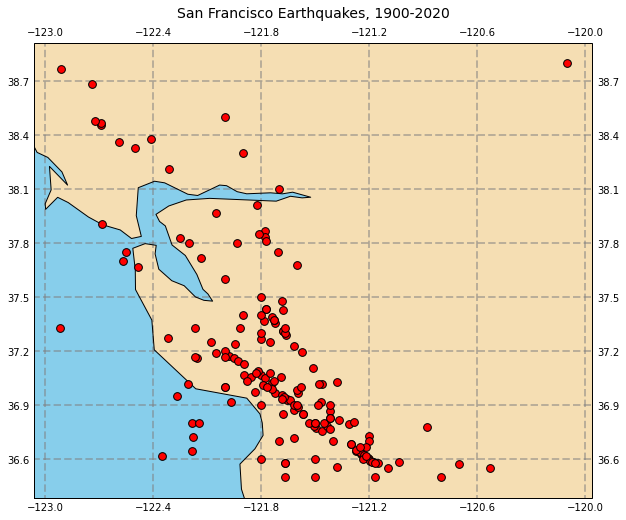

In [10]:
# set up a figure and choose the size by defining the width,height in inches.
plt.figure(figsize=(10,10))
# define an axis for the figure. We need to define the map projection for the figure - we will use Plate Carree.
ax = plt.axes(projection=cartopy.crs.PlateCarree())
# add gridlines to show the latitude and longitude
gl = ax.gridlines(crs=cartopy.crs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--', zorder=1)

# The title of the plot
ax.set_title('San Francisco Earthquakes, 1900-2020', fontsize=14, pad=25)

# We will use the natural earth dataset, which provides free mapping data, to add some background to the figure.
# display coastlines
ax.coastlines(resolution='50m')
# add the land
land = cartopy.feature.NaturalEarthFeature(category='physical', scale='50m', name='land', facecolor='wheat', zorder=0)
_ = ax.add_feature(land)
# add the ocean
ocean = cartopy.feature.NaturalEarthFeature(category='physical', scale='50m', name='ocean', facecolor='skyblue', zorder=0)
_ = ax.add_feature(ocean)

# make a scatter plot of the earthquakes. 
plt.scatter(x=df['longitude'], y=df['latitude'], zorder=2, # X values = longitudes, Y values = latitudes. zorder controls the order of the layers to make the points plot above the land
            c='red', edgecolors='black', s=60) # c = colour of points, edgecolors = colour of point outlines, s = size of points.

# save the figure. You can change the name to whatever you want the image to be called.
plt.savefig('San_Francisco_Earthquakes_1900-2020.png')
# show the figure in the notebook
plt.show()

### Colouring the points by another variable

Now we're going to make the same plot, but we're going to colour the points by another earthquake feature: in this case, magnitude. To do this, we simply set the `c` parameter in the scatterplot equal to the column in the dataframe. For magnitude, this would be:
```
c=df['mag']
```
The parameter `cmap` controls the colour scale. You can see all the colour maps available in matplotlib [here](https://matplotlib.org/3.1.1/gallery/color/colormap_reference.html): you simply type the name of the colour map you want. Here I have chosen 'Reds', so darker red means a higher magnitude. However, you could replace the word 'Reds' with the name of any other map.

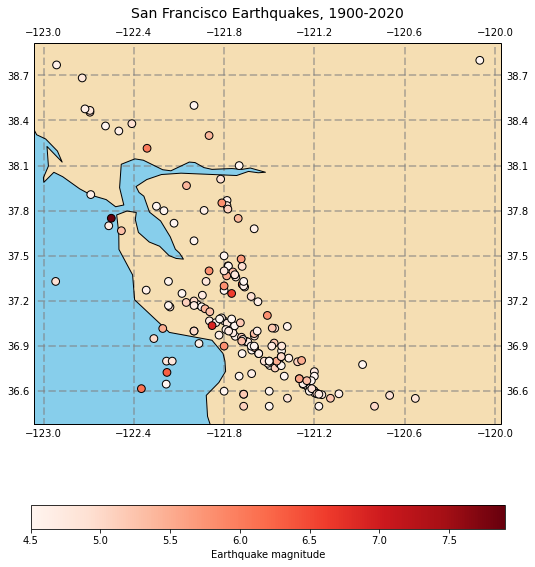

In [24]:
# set up a figure and choose the size by defining the width,height in inches.
plt.figure(figsize=(10,10))
# define an axis for the figure. We need to define the map projection for the figure - we will use Plate Carree.
ax = plt.axes(projection=cartopy.crs.PlateCarree())
# add gridlines to show the latitude and longitude
gl = ax.gridlines(crs=cartopy.crs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--', zorder=1)

# The title of the plot
ax.set_title('San Francisco Earthquakes, 1900-2020', fontsize=14, pad=25)

# We will use the natural earth dataset, which provides free mapping data, to add some background to the figure.
# display coastlines
ax.coastlines(resolution='50m')
# add the land
land = cartopy.feature.NaturalEarthFeature(category='physical', scale='50m', name='land', facecolor='wheat', zorder=0)
_ = ax.add_feature(land)
# add the ocean
ocean = cartopy.feature.NaturalEarthFeature(category='physical', scale='50m', name='ocean', facecolor='skyblue', zorder=0)
_ = ax.add_feature(ocean)

# make a scatter plot of the earthquakes. To colour by the magnitude, we set the variable c equal to the magnitude column in the dataframe (df['mag'])
cmap = cm.Reds # this is the colour scale for the magnitudes.
cbar = plt.scatter(x=df['longitude'], y=df['latitude'], zorder=2,    # X values = longitudes, Y values = latitudes. zorder controls the order of the layers to make the points plot above the land
                   c=df['mag'], cmap=cmap, edgecolors='black', s=60) # c = colour of points, edgecolors = colour of point outlines, s = size of points.

# add a colourbar. You can change the label, orientation, etc.
plt.colorbar(cbar, cmap=cmap, ax=ax, label='Earthquake magnitude', shrink=0.85, orientation='horizontal')

# save the figure. You can change the name to whatever you want the image to be called.
plt.savefig('San_Francisco_Earthquakes_Magnitude_1900-2020.png')
# show the figure in the notebook
plt.show()

## Practical exercise

Now you've worked your way through the notebook and introduced yourself to Python, try to answer the following questions. You can add some code blocks below to try out some data analysis (Just click the `+Code` button in the top left of the screen. Keep your answers and plots: we will discuss these at our online session next week.

1. What is the date and time of the **most recent earthquake** in the catalogue, and what Python command would you use to find this out?

2. Try playing around with the plotting script above. You can try to change the colour and marker style of the earthquake points, or try colouring the points by one of the other columns in the dataframe, such as earthquake depth. To do this, copy the code above into a new cell and change some of the parameters. Look at the [matplotlib scatter documentation](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html) to find out what the parameters do. **Messing around won't hurt it!** If it breaks, you can just close the tab and re-open. 

3. Save your new plot as a PNG image. This will be the way you create data for your project report.

4. Looking at your plot, where are the majority of the earthquakes located? Can you think of any reasons for this? HINT: try researching the tectonic setting of the region. Where are the major faults located?